In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import os

In [2]:

def calc_step(self, d):
    return np.sqrt(4 * d * 2)

def convert_d_from_nm2_ns_to_cm2_s(d: float):
    return d * 1e-14 / 1e-9

def convert_d_from_cm2_s_to_nm2_ns(d: float):
    return d * 1e-9 / 1e-14

def calc_d_from_step(step):
        """calculates the d value based on the step nm distance"""
        return (step**2) / (4 * 2)

In [3]:
%matplotlib inline

file_str = "src\\grana_model\\res\log\\01072022_displacement_data.csv"

filename = f"{pathlib.Path.cwd()}/{file_str}"

if os.path.exists(filename):
    df = pd.read_csv(filename)
else:
    print(f"{filename} does not exist")

df["displacement_sq"] = df["displacement"]**2


In [5]:
selection = df[['time', 'displacement_sq']].groupby("time").mean()

lm_time = np.arange(0, 2000)

line_y = np.linspace(0, np.max(selection["displacement_sq"]), 2000)

lm = np.poly1d(np.polyfit(df["time"], df["displacement_sq"], 1))
   
d = calc_d_from_step(step=lm.coef[0])
d_text = f"meas D = {d:.2e}"
exp_text = f"exp D = {convert_d_from_cm2_s_to_nm2_ns(d=1.88e-9):.2e}" # 1.88e-9 cm2/s
    
step_text = f"step_nm = {round(lm.coef[0], 5)} nm"

print(d_text)
print(exp_text)
print(step_text)


meas D = 1.28e-04
exp D = 1.88e-04
step_nm = 0.03202 nm


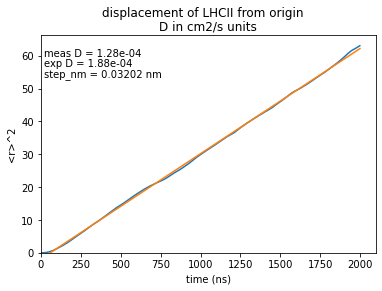

In [6]:


# plot the displacement_sq against the fit

plt.suptitle("displacement of LHCII from origin")
plt.title("D in cm2/s units")
plt.xlabel("time (ns)")
plt.ylabel("<r>^2")
plt.xlim(0, np.max(df["time"]) * 1.05)
plt.ylim(0, np.max(selection["displacement_sq"]) * 1.05)
plt.annotate(text=d_text, xy=(20, np.max(selection["displacement_sq"]) * 0.95))
plt.annotate(text=step_text, xy=(20, np.max(selection["displacement_sq"]) * 0.85))
plt.annotate(text=exp_text, xy=(20, np.max(selection["displacement_sq"]) * 0.90))
plt.plot(selection["displacement_sq"])
plt.plot(lm(lm_time))

In [ ]:
d0 = 0.00018 # d0 in nm2/ns

d1 = convert_d_from_nm2_ns_to_cm2_s(d0) # convert to cm2/s units

d2 = convert_d_from_cm2_s_to_nm2_ns(d1) # convert the cm2/s units back to nm2/ns units

print(f"d0==d2 is {d0 == d2}")

step_nm = calc_step(d0)

step_cm = calc_step(d1)

print(f"d0: {d0}, d1: {d1}, d2: {d2}")

print(f"nm/ns step: {step_nm}")

print(f"cm/s step: {step_cm}")


In [ ]:
df_d = pd.read_csv("C:\\projects\\grana_model\\src\\grana_model\\res\log\\d_calc.csv")
print(df_d.mean())

df_d.hist()

In [ ]:
from src.grana_model.dcalibrator import DCalibrator

structure_dict={
                "LHCII": {
                    "d": 1.8e-9,  # 1.8e-9 in cm2/s
                    "d_rot": 2e13,  # 2 x 10^3  rad^2 s^(-1)
                    "simulation_limit": 100000,
                    "distance_scalar": "well",
                    "diffusion_scalar": 1220.0,  # average over 250 steps, gave us this number for keeping step_nm equal to calculated step
                    "distance_threshold": 50.0,
                    "mass": 1000.0,
                    "mass_scalar": 1.0,
                    "rotation_scalar": 180.0,  # average over 250 steps, gives us <d_rot> of 2.00e13
                    "time_per_step": 2,  # in ns
                    "average_step_over": 250,
                    "calibrate_rot_d": False,
                    "calibrate_diff_d": False,
                }
}

dcal = DCalibrator(structure_dict["LHCII"])

d_ns = dcal.convert_d_from_rads2_s_to_rads2_ns(d=2e13)
print(d_ns)